# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

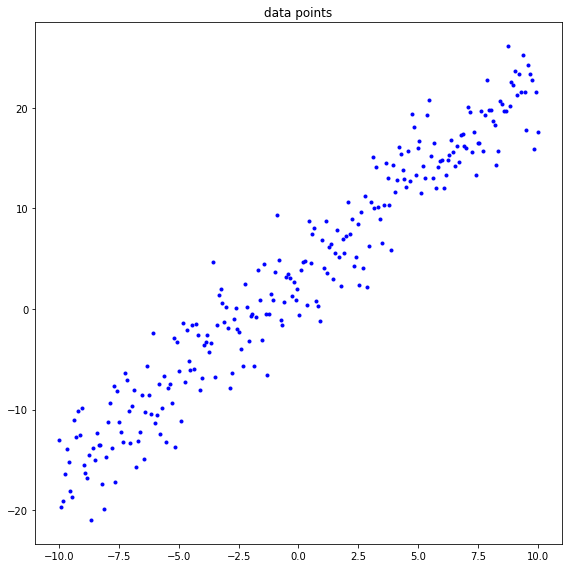

(256,)
(256,)


In [2]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()
print(x.shape)
print(y.shape)

## compute the loss function

In [3]:
def compute_loss(x, y, theta0, theta1):
    tmp = x*theta1 + theta0 - y
    loss = np.linalg.norm(tmp)**2 / (2*len(x))
    return loss

## compute the gradient for each model parameter

In [4]:
def compute_gradient_theta0(x, y, theta0, theta1):
    dL = np.sum(x*theta1 + theta0 - y) / len(x)

    return dL

In [5]:
def compute_gradient_theta1(x, y, theta0, theta1):

    dL = np.sum( (x*theta1 + theta0 - y) * x ) / len(x)
    return dL

## gradient descent for each model parameter

In [6]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x,y,theta0,theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x,y,theta0,theta1)
    loss    = compute_loss(x,y,theta0,theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

print(theta0_iteration[-1], theta1_iteration[-1],loss_iteration[-1])

iteration =    0, loss = 38.92372
iteration =    1, loss = 22.45805
iteration =    2, loss = 15.14235
iteration =    3, loss = 11.86256
iteration =    4, loss = 10.36354
iteration =    5, loss = 9.65082
iteration =    6, loss = 9.28587
iteration =    7, loss = 9.07528
iteration =    8, loss = 8.93374
iteration =    9, loss = 8.82363
iteration =   10, loss = 8.72832
iteration =   11, loss = 8.64046
iteration =   12, loss = 8.55681
iteration =   13, loss = 8.47590
iteration =   14, loss = 8.39708
iteration =   15, loss = 8.32004
iteration =   16, loss = 8.24463
iteration =   17, loss = 8.17075
iteration =   18, loss = 8.09837
iteration =   19, loss = 8.02743
iteration =   20, loss = 7.95791
iteration =   21, loss = 7.88977
iteration =   22, loss = 7.82299
iteration =   23, loss = 7.75754
iteration =   24, loss = 7.69339
iteration =   25, loss = 7.63052
iteration =   26, loss = 7.56890
iteration =   27, loss = 7.50851
iteration =   28, loss = 7.44932
iteration =   29, loss = 7.39130
itera

In [7]:
f = x*theta1 + theta0
print(f.shape)

(256,)


## plot the results

In [8]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')

    plt.plot(x,y,'o', color = 'blue')
    plt.plot(x,f,'-', color = 'red')
    plt.tight_layout()
    plt.show()

In [9]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot(range(1,len(loss_iteration)+1), loss_iteration, '-', color = 'red')
    
    plt.tight_layout()
    plt.show()

In [ ]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')


    plt.tight_layout()
    plt.show()

In [ ]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = 

grid_loss   = 


def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')


    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

In [ ]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

In [ ]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

In [ ]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

In [ ]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)